## Analyzing Star Wars Data

The team at FiveThirtyEight surveyed a question with star wars fans **does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?** using the online tool SurveyMonkey. They received 835 total responses. So we will be analyzing these data based on the responses from the star wars fans and will answer the above question

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

We need to specify an encoding because the data set has some characters that aren't in Python's default utf-8 encoding. 

## Overview Data

In [2]:
#Lets analyze the data
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Epi

In [3]:
#Lets analyze the data types
star_wars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1187 entries, 0 to 1186
Data columns (total 38 columns):
RespondentID                                                                                                                                     1186 non-null float64
Have you seen any of the 6 films in the Star Wars franchise?                                                                                     1187 non-null object
Do you consider yourself to be a fan of the Star Wars film franchise?                                                                            837 non-null object
Which of the following Star Wars films have you seen? Please select all that apply.                                                              674 non-null object
Unnamed: 4                                                                                                                                       572 non-null object
Unnamed: 5                                                       

## Conclusion

The data has several columns, including:

- RespondentID - An anonymized ID for the respondent (person taking the survey)
- Gender - The respondent's gender
- Age - The respondent's age
- Household Income - The respondent's income
- Education - The respondent's education level
- Location (Census Region) - The respondent's location
- Have you seen any of the 6 films in the Star Wars franchise? - Has a Yes or No response
- Do you consider yourself to be a fan of the Star Wars film franchise? - Has a Yes or No response

We observed that ** RespondentID** is a unique ID but it contains many blank rows. So we will remove those rows with invalid ** RespondentID**

In [4]:
#Lets analyze columns
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [5]:
# Selecting rows with geniuine respondent id
star_wars=star_wars[star_wars['RespondentID'].notna()]

In [6]:
# Verifying Data
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
10,3.292640e+09,Yes,No,NaN,Star Wars: Episode II Attack of the Clones,NaN,NaN,NaN,NaN,1,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,

## Conclusion

Now star_wars dataframe conatin rows where **RespondentID** is not **NaN**.

## Cleaning and Mapping Yes/No Columns

Columns **Have you seen any of the 6 films in the Star Wars franchise?** and **Do you consider yourself to be a fan of the Star Wars film franchise?** have values **Yes/No**. But they can also be NaN where a respondent chooses not to answer a question.

In [7]:
# Analyzing user response for the view count
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'][:20]

1     Yes
2      No
3     Yes
4     Yes
5     Yes
6     Yes
7     Yes
8     Yes
9     Yes
10    Yes
11    Yes
12     No
13    Yes
14    Yes
15    Yes
16    Yes
17    Yes
18    Yes
19    Yes
20    Yes
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: object

In [8]:
# Analyzing user response for fan count
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'][:20]

1     Yes
2     NaN
3      No
4     Yes
5     Yes
6     Yes
7     Yes
8     Yes
9     Yes
10     No
11    NaN
12    NaN
13     No
14    Yes
15    Yes
16    Yes
17    Yes
18    Yes
19    Yes
20    Yes
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: object

## Conclusion

We can see that both colum contain values as Yes,No or NAN.

It will be easier if we convert these values in boolean as booleans are easier to work with because we can select the rows that are True or False without having to do a string comparison.

In [9]:
# Conrting Yes/No values as Boolean values
yes_no = {
    "Yes": True,
    "No": False
}

star_wars=star_wars.copy()
star_wars['Have you seen any of the 6 films in the Star Wars franchise?']=star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)

star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?']=star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)

In [10]:
# Verifying the conversion
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'][:20]

1      True
2     False
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12    False
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: bool

In [11]:
# Verifying the conversion
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'][:20]

1      True
2       NaN
3     False
4      True
5      True
6      True
7      True
8      True
9      True
10    False
11      NaN
12      NaN
13    False
14     True
15     True
16     True
17     True
18     True
19     True
20     True
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: object

## Modifying Movie Column Names

The next six columns represent a single checkbox question. The respondent checked off a series of boxes in response to the question, **Which of the following Star Wars films have you seen? Please select all that apply.**

The columns for this question are:

- Which of the following Star Wars films have you seen? Please select all that apply. - Whether or not the respondent saw Star Wars: Episode I The Phantom Menace.
- Unnamed: 4 - Whether or not the respondent saw Star Wars: Episode II Attack of the Clones.
- Unnamed: 5 - Whether or not the respondent saw Star Wars: Episode III Revenge of the Sith.
- Unnamed: 6 - Whether or not the respondent saw Star Wars: Episode IV A New Hope.
- Unnamed: 7 - Whether or not the respondent saw Star Wars: Episode V The Empire Strikes Back.
- Unnamed: 8 - Whether or not the respondent saw Star Wars: Episode VI Return of the Jedi.

In [12]:
# Analyzig movie column values
star_wars['Which of the following Star Wars films have you seen? Please select all that apply.']

1       Star Wars: Episode I  The Phantom Menace
2                                            NaN
3       Star Wars: Episode I  The Phantom Menace
4       Star Wars: Episode I  The Phantom Menace
5       Star Wars: Episode I  The Phantom Menace
6       Star Wars: Episode I  The Phantom Menace
7       Star Wars: Episode I  The Phantom Menace
8       Star Wars: Episode I  The Phantom Menace
9       Star Wars: Episode I  The Phantom Menace
10                                           NaN
11                                           NaN
12                                           NaN
13      Star Wars: Episode I  The Phantom Menace
14      Star Wars: Episode I  The Phantom Menace
15      Star Wars: Episode I  The Phantom Menace
16      Star Wars: Episode I  The Phantom Menace
17                                           NaN
18      Star Wars: Episode I  The Phantom Menace
19      Star Wars: Episode I  The Phantom Menace
20      Star Wars: Episode I  The Phantom Menace
21      Star Wars: E

Now we will modify the values in the column such that if the movie is seen we will mark them as True and if not then NAN.

In [13]:
# Mapping movie column as boolean values
movie_mapping = {
    "Star Wars: Episode I  The Phantom Menace": True,
    np.nan: False,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True
}

for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(movie_mapping)

In [14]:
# Verifying conversion
star_wars.loc[3:9].head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,True,True,True,True,True,True,True,True,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,True,True,True,True,True,True,True,True,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,True,True,True,True,True,True,True,True,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic


In [15]:
# Renaming the column to seen_1,seen_2... and so on
star_wars = star_wars.rename(columns={
        "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
        "Unnamed: 4": "seen_2",
        "Unnamed: 5": "seen_3",
        "Unnamed: 6": "seen_4",
        "Unnamed: 7": "seen_5",
        "Unnamed: 8": "seen_6"
        })

In [16]:
# Verifying data
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,True,True,True,True,True,True,True,True,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,True,True,True,True,True,True,True,True,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,True,True,True,True,True,True,True,True,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
10,3.292640e+09,True,False,False,True,False,False,False,False,1,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific


## Modifying Ranking Columns

We have given meaningful names to column. Now lets analyze next 6 columns.

The next six columns ask the respondent to rank the Star Wars movies in order of least favorite to most favorite. 1 means the film was the most favorite, and 6 means it was the least favorite. Each of the following columns can contain the value 1, 2, 3, 4, 5, 6, or NaN:

- Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film. - How much the respondent liked Star Wars: Episode I The Phantom Menace
- Unnamed: 10 - How much the respondent liked Star Wars: Episode II Attack of the Clones
- Unnamed: 11 - How much the respondent liked Star Wars: Episode III Revenge of the Sith
- Unnamed: 12 - How much the respondent liked Star Wars: Episode IV A New Hope
- Unnamed: 13 - How much the respondent liked Star Wars: Episode V The Empire Strikes Back
- Unnamed: 14 - How much the respondent liked Star Wars: Episode VI Return of the Jedi

As we can observe that there mostly integer values in these columns so we will convet them as float data type

In [17]:
# Converting data type from integer to float
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

Now we will rename the column names to give more meaningful aspect of data.

In [18]:
# Renaming columns
star_wars = star_wars.rename(columns={
        "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
        "Unnamed: 10": "ranking_2",
        "Unnamed: 11": "ranking_3",
        "Unnamed: 12": "ranking_4",
        "Unnamed: 13": "ranking_5",
        "Unnamed: 14": "ranking_6"
        })

#Verifying Data
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


Now lets analyze the ranking columns and plot them

## Analyzing Rankings

In [19]:
# Find mean values of ranking columns
mean=star_wars[star_wars.columns[9:15]].mean()

In [20]:
# Verifying average ranking mean values
mean

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

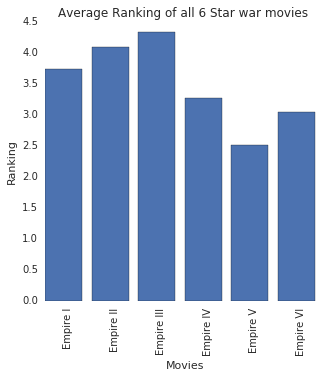

In [21]:
# Plot average ranking mean values
sns.set_style('white')
x_tile= ["Empire I","Empire II",'Empire III','Empire IV','Empire V','Empire VI']
fig,ax= plt.subplots(figsize=(5,5))
x= np.arange(len(mean.index))
y= mean.values
ax.bar(x,y)
ax.set_xticks([0.5,1.5,2.5,3.5,4.5,5.5])
ax.set_xticklabels(x_tile,rotation=90)
ax.set_title("Average Ranking of all 6 Star war movies ")
ax.set_ylabel('Ranking')
ax.set_xlabel('Movies')
ax.tick_params(bottom="off",top="off",left="off",right="off")
for sp in ax.spines:
    ax.spines[sp].set_visible(False)
plt.show()

## Conclusion

From above plot it looks like the **"original" movies** are rated much more highly than the newer ones.

## Analyzing View counts

In [22]:
# Calculating value count for seen movies
total_seen=star_wars.iloc[:,3:9].sum()

In [23]:
# Verifying Data
total_seen

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

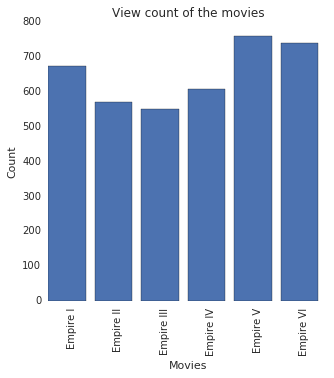

In [24]:
# Plot view count of the movies
sns.set_style('white')
fig,ax= plt.subplots(figsize=(5,5))
x= np.arange(len(total_seen.index))
y= total_seen.values
ax.bar(x,y)
ax.set_xticks([0.5,1.5,2.5,3.5,4.5,5.5])
ax.set_xticklabels(x_tile,rotation=90)
ax.set_title("View count of the movies")
ax.set_ylabel('Count')
ax.set_xlabel('Movies')
ax.tick_params(bottom="off",top="off",left="off",right="off")
for sp in ax.spines:
    ax.spines[sp].set_visible(False)
plt.show()

## Conclusion

From above plot we can observe that:
- New movies are seen by most of the people. 
This differs from the rating as new movies are rated low than the old ones

## Rankings based on Gender

In [25]:
# Filtering data based on gender
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

In [26]:
# Calculating mean values of ranking genderwise
males_mean=males[males.columns[9:15]].mean()
females_mean=females[females.columns[9:15]].mean()

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:1428: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



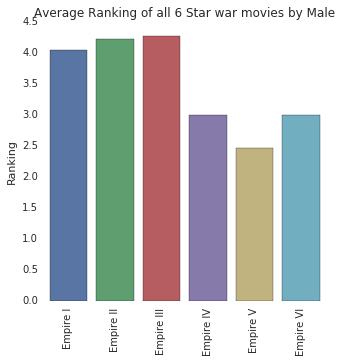

In [27]:
# Plot average ranking of movies for Male
import seaborn as sns
sns.set_style('white')
# plt.style.use('seaborn-paper')
fig,ax= plt.subplots(figsize=(5,5))
x= np.arange(len(males_mean.index))
y= males_mean.values
sns.barplot(x,y)
# ax.set_xticks([0.5,1.5,2.5,3.5,4.5,5.5])
ax.set_xticklabels(x_tile,rotation=90)
ax.set_title("Average Ranking of all 6 Star war movies by Male")
ax.set_ylabel('Ranking')
ax.tick_params(bottom="off",top="off",left="off",right="off")
for sp in ax.spines:
    ax.spines[sp].set_visible(False)
plt.show()

['seaborn-ticks', 'bmh', 'fivethirtyeight', 'seaborn-white', 'seaborn-muted', 'dark_background', 'seaborn-poster', 'seaborn-whitegrid', 'seaborn-talk', 'seaborn-notebook', 'ggplot', 'seaborn-deep', 'classic', 'seaborn-dark-palette', 'seaborn-darkgrid', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-paper', 'seaborn-pastel']


/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:1428: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



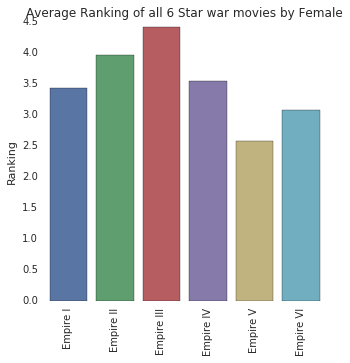

In [28]:
# Plot average ranking of movies for Females
import seaborn as sns
print(plt.style.available)
sns.set_style('white')
fig,ax= plt.subplots(figsize=(5,5))
x= np.arange(len(females_mean.index))
y= females_mean.values
sns.barplot(x,y)
# ax.set_xticks([0.5,1.5,2.5,3.5,4.5,5.5])
ax.set_xticklabels(x_tile,rotation=90)
ax.set_title("Average Ranking of all 6 Star war movies by Female")
ax.set_ylabel('Ranking')
ax.tick_params(bottom="off",top="off",left="off",right="off")
for sp in ax.spines:
    ax.spines[sp].set_visible(False)
plt.show()

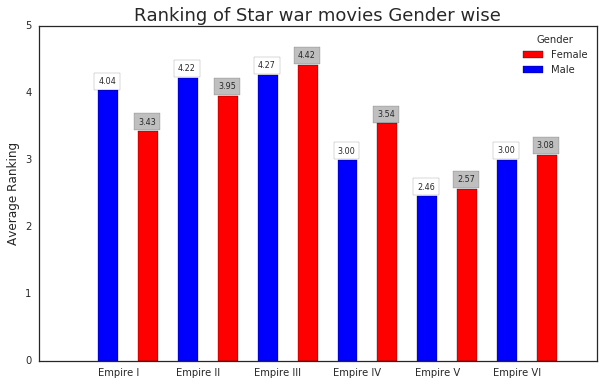

In [29]:
# Plot average ranking of movies for both genders
sns.set_style('white')
plt.figure(figsize=(10, 6))
width = 0.25
plt.bar(np.arange(1,len(females_mean.index)+1)+width,females_mean.values,width,label="Female",color="red")
plt.bar(np.arange(1,len(males_mean.index)+1)-width,males_mean.values,width,label="Male",color="blue")

plt.xticks(np.arange(1,len(females_mean.index)+1), x_tile,fontsize=10)
for i,d in enumerate(males_mean.values):
    plt.text(x=i+1-width, y=d+0.10,s='{:.2f}'.format(d),fontdict=dict(fontsize=8),bbox=dict(facecolor='white', alpha=0.5))

for i,d in enumerate(females_mean.values):
    plt.text(x=i+1+width, y=d+0.10,s='{:.2f}'.format(d),fontdict=dict(fontsize=8),bbox=dict(facecolor='gray', alpha=0.5))    
    
plt.legend(title='Gender')
plt.ylabel('Average Ranking',fontsize=12)
plt.ylim(0,5)
plt.title('Ranking of Star war movies Gender wise',fontsize=18)
plt.show()

## Conclusion

From above plot we can observe that:
- **Empire I,Empire II and Empire III (i.e old) movies** are *highly* ranked by Males than Females
- **Empire IV,Empire V and Empire VI (i.e new) movies** are *highly* ranked by Females than Males
- **Old movies** are rated more than the **New ones** by both the genders

## View Count based on Gender

In [30]:
# Calculating movie view count for males 
males_seen=males.iloc[:,3:9].sum()
males_seen

seen_1    361
seen_2    323
seen_3    317
seen_4    342
seen_5    392
seen_6    387
dtype: int64

In [31]:
# Calculating movie view count for females 
females_seen=females.iloc[:,3:9].sum()
females_seen

seen_1    298
seen_2    237
seen_3    222
seen_4    255
seen_5    353
seen_6    338
dtype: int64

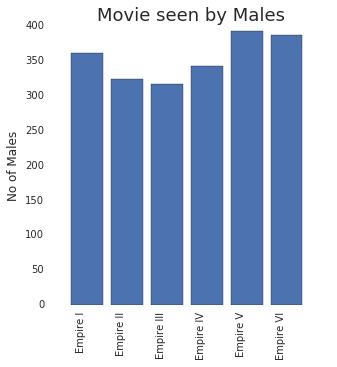

In [32]:
# Plot view count of the movies for Males
sns.set_style('white')
fig,ax= plt.subplots(figsize=(5,5))
x= np.arange(len(males_seen.index))
y= males_seen.values
width=0.5
ax.bar(x+width,y)
ax.set_xticks([0.75,1.75,2.75,3.75,4.75,5.75])
ax.set_xticklabels(x_tile,rotation=90)
ax.set_title("Movie seen by Males",fontsize=18)
ax.set_ylabel('No of Males',fontsize=12)
ax.tick_params(bottom="off",top="off",left="off",right="off")
for sp in ax.spines:
    ax.spines[sp].set_visible(False)
plt.show()

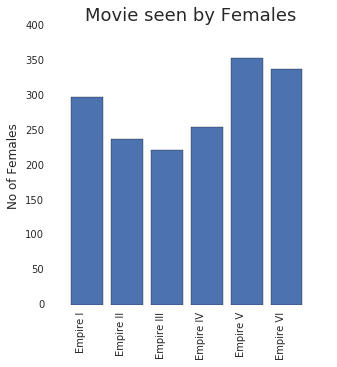

In [33]:
# Plot view count of the movies for Females
fig,ax= plt.subplots(figsize=(5,5))
sns.set_style('white')
x_tile= ["Empire I","Empire II",'Empire III','Empire IV','Empire V','Empire VI']
x= np.arange(len(females_seen.index))
y= females_seen.values
width=0.5
ax.bar(x+width,y)
ax.set_xticks([0.75,1.75,2.75,3.75,4.75,5.75])
ax.set_xticklabels(x_tile,rotation=90)
ax.set_title("Movie seen by Females",fontsize=18)
ax.set_ylabel('No of Females',fontsize=12)
# ax.tick_params(bottom="off",top="off",left="off",right="off")
for sp in ax.spines:
    ax.spines[sp].set_visible(False)
plt.show()

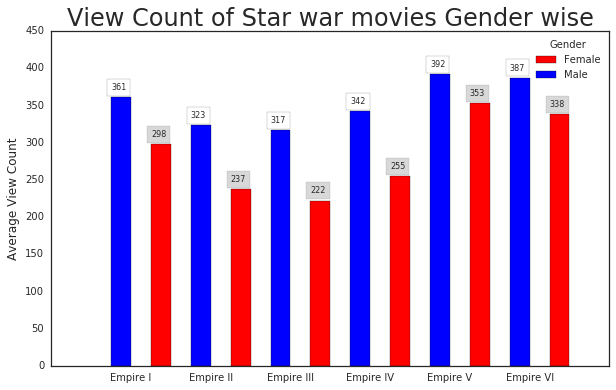

In [34]:
# Plot view count of the movies for Females
sns.set_style('white')
plt.figure(figsize=(10, 6))
width = 0.25
x_tile= ["Empire I","Empire II",'Empire III','Empire IV','Empire V','Empire VI']
plt.bar(np.arange(1,len(females_seen.index)+1)+width,females_seen.values,width,label="Female",color="red")
plt.bar(np.arange(1,len(males_seen.index)+1)-width,males_seen.values,width,label="Male",color="blue")

plt.xticks(np.arange(1,len(females_seen.index)+1), x_tile,fontsize=10)
for i,d in enumerate(males_seen.values):
    plt.text(x=i+1-width, y=d+10,s=d,fontdict=dict(fontsize=8),bbox=dict(facecolor='white', alpha=0.5))

for i,d in enumerate(females_seen.values):
    plt.text(x=i+1+width, y=d+10,s=d,fontdict=dict(fontsize=8),bbox=dict(facecolor='gray', alpha=0.3))    

plt.legend(title='Gender')
plt.ylabel('Average View Count',fontsize=12)
plt.ylim(0,450)
plt.title('View Count of Star war movies Gender wise',fontsize=24)
plt.show()

## Conclusion

We can observe from above plot that:
- Males have seen all the movies more than females
- Among females most viewed movies are the new ones.
- **Empire V** movie is the most watched movie by both the Genders  

## Ranking based on the Education

In [35]:
# Analyzing data based on education
star_wars['Education'].value_counts(dropna=False)

Some college or Associate degree    328
Bachelor degree                     321
Graduate degree                     275
NaN                                 150
High school degree                  105
Less than high school degree          7
Name: Education, dtype: int64

In [36]:
# Calculating pivot Data for ranking grouped by education
pivot_data= star_wars.pivot_table(values=['ranking_1','ranking_2','ranking_3','ranking_4','ranking_5','ranking_6'],index='Education',dropna=True,aggfunc=np.mean)
pivot_data.reset_index(inplace=True)

#Verifying pivot data
pivot_data

,Education,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
0,Bachelor degree,3.828244,4.290076,4.521073,3.114504,2.309160,2.931298
1,Graduate degree,3.822222,4.225664,4.500000,3.199115,2.323009,2.920354
2,High school degree,3.802817,3.746479,4.126761,3.211268,2.873239,3.239437
3,Less than high school degree,5.000000,5.333333,3.666667,2.666667,1.000000,3.333333
4,Some college or Associate degree,3.551181,3.885827,4.102362,3.503937,2.783465,3.173228


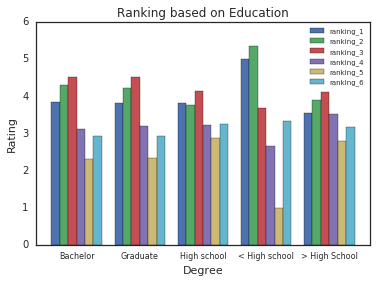

In [37]:
# Plot pivot data for ranking based on education
pivot_data.plot.bar(width=0.8)
deg=['Bachelor','Graduate','High school','< High school','> High School']
plt.xticks(np.arange(0,5),deg,fontsize=8,rotation=0)
plt.legend(fontsize=7)
plt.ylabel('Rating')
plt.xlabel('Degree')
plt.title('Ranking based on Education')
plt.show()

## Conclusion

From above plot we can observe that:
- 1st movie is rated high from all education aspect
- 2nd movie is rated high by students who are below ** High School**
- 5th movie is rated low by students who are below ** High School**

## View Count  based on the Location

In [38]:
#Unique values
star_wars['Location (Census Region)'].value_counts(dropna=False)

East North Central    181
Pacific               175
South Atlantic        170
NaN                   143
Middle Atlantic       122
West South Central    110
West North Central     93
Mountain               79
New England            75
East South Central     38
Name: Location (Census Region), dtype: int64

In [39]:
#Setting a pivot table:
pivot_location= star_wars.pivot_table(values=['seen_1','seen_2','seen_3','seen_4','seen_5','seen_6'],index='Location (Census Region)',dropna=True,aggfunc=np.sum,)
pivot_location.reset_index(inplace=True)
pivot_location

,Location (Census Region),seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
0,East North Central,102.0,89.0,89.0,95.0,128.0,121.0
1,East South Central,24.0,21.0,21.0,27.0,31.0,29.0
2,Middle Atlantic,79.0,69.0,70.0,76.0,83.0,85.0
3,Mountain,57.0,47.0,46.0,54.0,61.0,59.0
4,New England,50.0,44.0,43.0,48.0,55.0,54.0
5,Pacific,120.0,99.0,92.0,105.0,123.0,124.0
6,South Atlantic,104.0,82.0,79.0,93.0,125.0,120.0
7,West North Central,61.0,51.0,49.0,49.0,67.0,63.0
8,West South Central,62.0,58.0,50.0,49.0,70.0,69.0


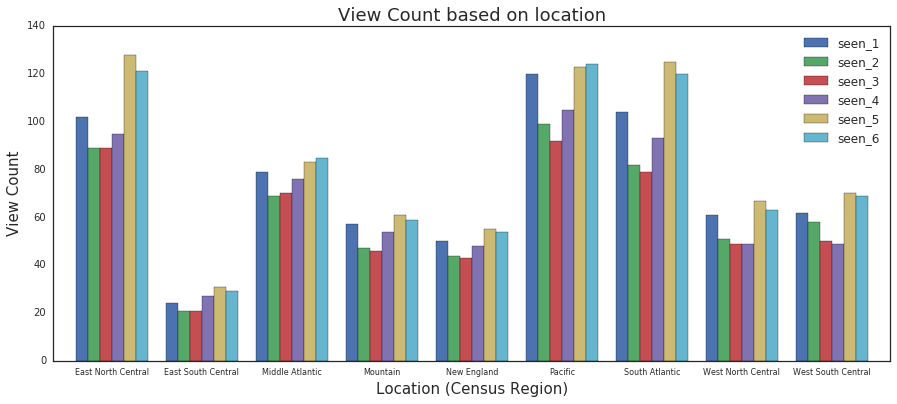

In [40]:
#Plotting pivot
pivot_location.plot.bar(figsize=(15,6),width=0.8)
deg=['East North Central','East South Central','Middle Atlantic','Mountain','New England','Pacific','South Atlantic','West North Central','West South Central']
plt.xticks(np.arange(0,9),deg,fontsize=8,rotation=0)
plt.legend(fontsize=12)
plt.ylabel('View Count',fontsize=15)
plt.xlabel('Location (Census Region)',fontsize=15)
plt.title('View Count based on location',fontsize=18)
plt.show()

## Conclusion

From above plot we can observe that:
- People of **East North Central,Pacific and South Atlantic** have overall seen more movies than people of other regions
- People of **East South Central** have seen less movies
- **5th movie** is the *highest* viewed movie in all the regions

## Analyzing the most loved and hated character

In [41]:
#Now renaming columns 15-28:
name_mapping = {'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.':'Han Solo',
                'Unnamed: 16':'Luke Skywalker','Unnamed: 17':'Princess Leia','Unnamed: 18':'Anakin','Unnamed: 19':'Obi wan Kenobi',
                'Unnamed: 20':'Palpatine','Unnamed: 21':'Darth Vader','Unnamed: 22':'Lando','Unnamed: 23':'Boba Fett','Unnamed: 24':'C-3PO',
                'Unnamed: 25':'R2 D2','Unnamed: 26':'Jar Jar Binks','Unnamed: 27':'Padme','Unnamed: 28':'Yoda'}
star_wars=star_wars.rename(columns=(name_mapping)).copy()

In [42]:
#Lets check for NAN values on character columns:
star_wars[star_wars.columns[15:29]].isna().sum()

Han Solo          357
Luke Skywalker    355
Princess Leia     355
Anakin            363
Obi wan Kenobi    361
Palpatine         372
Darth Vader       360
Lando             366
Boba Fett         374
C-3PO             359
R2 D2             356
Jar Jar Binks     365
Padme             372
Yoda              360
dtype: int64

## Conclusion

As we can observe that the missing values lies in about the same range i.e 355-374 so it could be because of some similar dataset missing . So we can remove them as it will affect to all column as the same.  

In [43]:
#Lets drop NAN values on character columns:
character_star_wars=star_wars[star_wars.columns[15:29]].dropna(axis=0)

In [44]:
#Verify the data
character_star_wars.head(10)

,Han Solo,Luke Skywalker,Princess Leia,Anakin,Obi wan Kenobi,Palpatine,Darth Vader,Lando,Boba Fett,C-3PO,R2 D2,Jar Jar Binks,Padme,Yoda
1,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
3,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A)
4,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
5,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably
6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Neither favorably nor unfavorably (neutral),Very favorably,Neither favorably nor unfavorably (neutral),Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably
7,Very favorably,Very favorably,Somewhat favorably,Somewhat favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat unfavorably,Somewhat favorably,Very favorably
8,Very favorably,Somewhat favorably,Very favorably,Neither favorably nor unfavorably (neutral),Very favorably,Very unfavorably,Somewhat unfavorably,Neither favorably nor unfavorably (neutral),Somewhat favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat unfavorably,Very favorably
9,Very favorably,Somewhat unfavorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Very favorably,Very favorably,Very favorably,Very favorably,Neither favorably nor unfavorably (neutral),Somewhat favorably,Very unfavorably,Somewhat unfavorably,Somewhat favorably
10,Neither favorably nor unfavorably (neutral),Very favorably,Very favorably,Very favorably,Very favorably,Somewhat unfavorably,Very favorably,Somewhat unfavorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Somewhat unfavorably,Very favorably
13,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Very favorably,Neither favorably nor unfavorably (neutral),Somewhat favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably


## Mapping character column values

We can convert the ratings in integer format to perform our calculation easily. So we will map values as: 
- Very favorably:6
- Somewhat favorably:5
- Neither favorably nor unfavorably (neutral):4
- Somewhat unfavorably:3 
- Unfamiliar (N/A):2
- Very unfavorably:1

In [45]:
#Mapping character column data
mapping = {'Very favorably':6,'Somewhat favorably':5,'Neither favorably nor unfavorably (neutral)':4,'Somewhat unfavorably':3,'Unfamiliar (N/A)':2,'Very unfavorably':1}

for c in character_star_wars:
  character_star_wars[c]=character_star_wars[c].map(mapping)

In [49]:
# Verifying data
character_star_wars.head(10)

,Han Solo,Luke Skywalker,Princess Leia,Anakin,Obi wan Kenobi,Palpatine,Darth Vader,Lando,Boba Fett,C-3PO,R2 D2,Jar Jar Binks,Padme,Yoda
1,6,6,6,6,6,6,6,2,2,6,6,6,6,6
3,5,5,5,5,5,2,2,2,2,2,2,2,2,2
4,6,6,6,6,6,5,6,5,3,6,6,6,6,6
5,6,5,5,3,6,1,5,4,6,5,5,1,5,5
6,6,6,6,6,6,4,6,4,5,5,5,5,4,6
7,6,6,5,5,6,6,6,6,6,5,6,3,5,6
8,6,5,6,4,6,1,3,4,5,5,5,1,3,6
9,6,3,5,5,5,6,6,6,6,4,5,1,3,5
10,4,6,6,6,6,3,6,3,3,6,6,6,3,6
13,5,6,5,5,5,5,6,4,5,6,6,6,5,6


In [47]:
# Find average rating of each character
character_mean=character_star_wars.mean().sort_values(ascending=False)

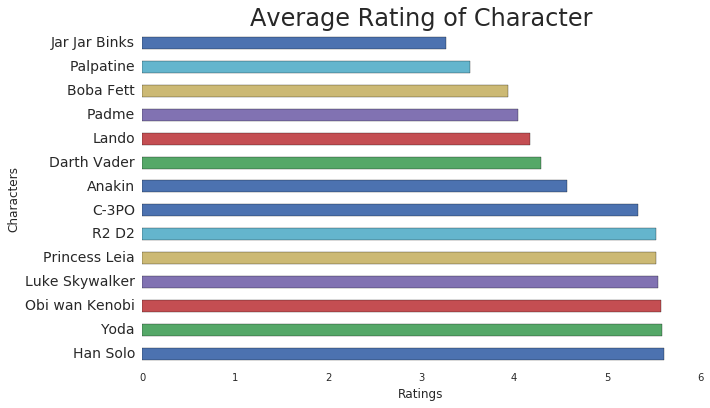

In [48]:
# Plot the graph
sns.set_style('white')
plt.figure(figsize=(10, 6))
character_mean.plot.barh()

plt.box(False) #remove box
plt.yticks(fontsize=14)

plt.xlabel('Ratings',fontsize=12)
plt.ylabel('Characters',fontsize=12)
plt.title('Average Rating of Character',fontsize=24)
plt.show()

# Conclusion
- As obvious **Han Solo** is the most liked character
- **Yoda** is the second most liked character
- **Jar Jar Binks** is the least liked character

## Overall Conclusions:
- **'Empire Strikes back' is the favourite movie in Star Wars Saga**
- **New Movies are way more liked by fans than older ones**
- **Star Wars has a good distribution of both Male and Female fans**
- **Han solo is the most liked character and Jar Jar binks is the least liked character**